# Introduction to Decision Trees
Let us start off with a thought experiment to understand why we may use a decision tree. 

Imagine you play tennis every Saturday and you always invite a friend to come play. Sometimes the friend shows up, and sometimes not. For him, it depends on a variety of factors, such as: weather, temperature, humidity, wind, etc. You start to keep track of these features and whether or not he showed up to play. 

Image you have now collected the data and it looks something like:

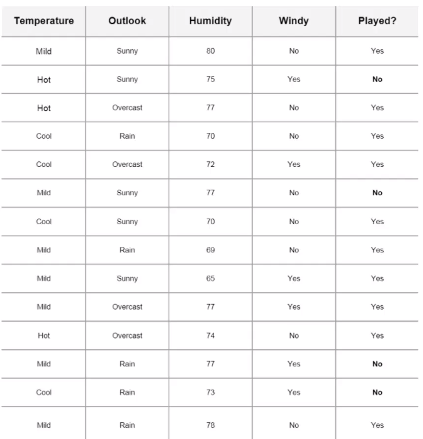

In [2]:
from IPython.display import Image 
Image(filename='tennis_data.PNG')

You want to use this data to predict whether or not your friend will show up to play. An intuitive way to do this is through a Decision Tree:

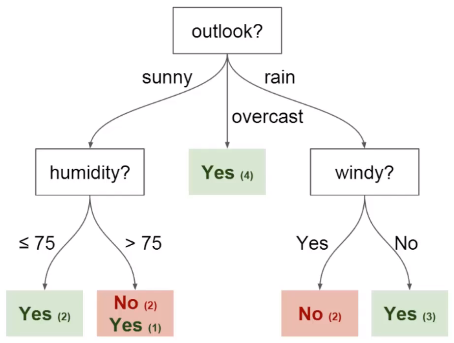

In [3]:
Image(filename='tennis_tree.PNG')

In this tree, we have:
- **Nodes**: Split for the value of a certain attribute
- **Edges**: Outcome of a split to next node
- **Root**: The node that performs the first split
- **Leaves**: Terminal nodes that predict the outcome

Let us discuss the inution on the splitting between the nodes. 

Here is more made up data with three features, X, Y, Z, with two possible classes that you are trying to predict. 

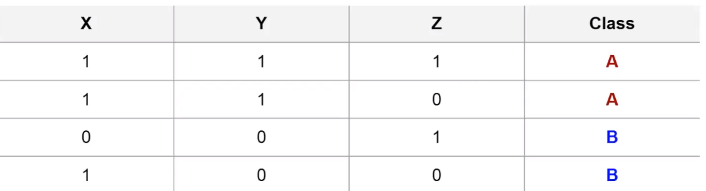

In [4]:
Image(filename='imaginary_data.PNG')

Splitting on Y gives us a clear spearation between classes. If you ask if Y is equal to 1, you get perfect separation between the two classes. 

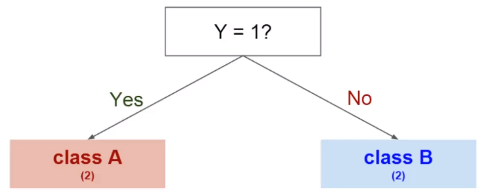

In [5]:
Image(filename='split_on_y.PNG')

You could have tried to split based on other features first. If you split on X or Z first, you do not get proper separation. 

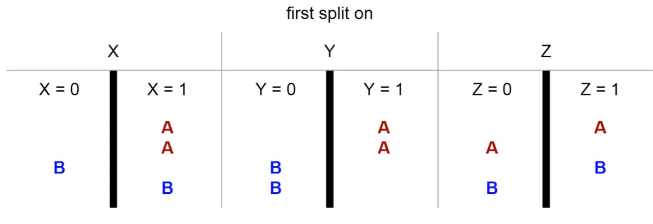

In [6]:
Image(filename='other_splits.PNG')

Entropy and Infomation Gain are the Mathematical Methods of choosing the best split. Check the reading material for more information. But the intuition is to choose the feature that best splits the data (trying to maximize the information gain). 

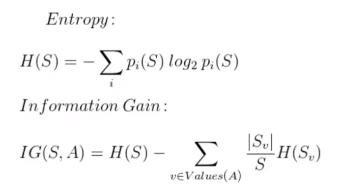

In [7]:
Image(filename='entropy and info gain formula.PNG')

# Introduction to Random Forests
To improve performance, we can use many trees with a random sample of features chosen as the split. Decision trees do not tend to have the best prediction accuracy, partially due to the high variance. 

A new random sample of m features (out of a total of p) is chosen for **every single tree at every single split**. 

For **classification**, m is typically chosen to be the square root of p. 

What's the point of using random forests? Suppose there is **one very strong feature** in the data set. When using "bagged" trees, most of the trees will use that features as the top split, resulting in an ensemble of similar trees that are **highly correlated**. By leaving out random features, the random forests are going to decorrelate the trees, making them independent of each other. 

# Decision Trees and Random Forests with Python

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


This data set represents a number of patients who had Kyphosis (a spinal condition) and then had a corrective spinal surgery. This data tells us if the Kyphosis was present or absent after the operation, the age of the person in **months**, the number of vertebrae involved in the operation, and the start value is the number of the top-most vertebrae that was operated on. 

So, the first row tells us that for this patient, that the Kyphosis was absent post-operation, they are 71 months old (5 years, 11 months), three vertebrae were operated on, with the top-most vertebrae being the 5th one. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


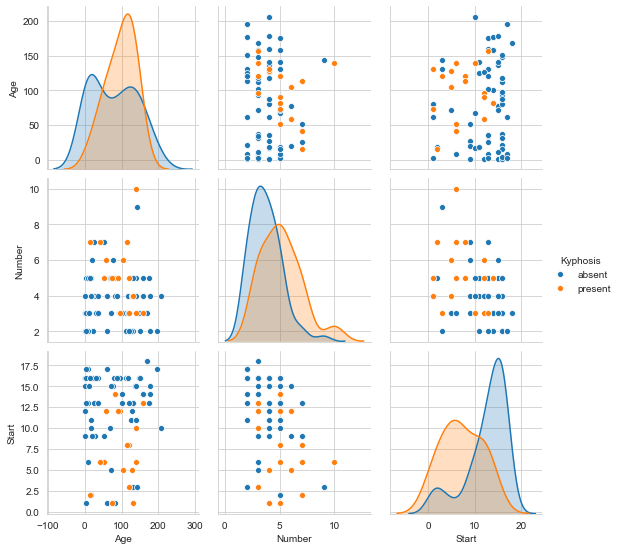

In [6]:
sns.pairplot(df, hue='Kyphosis')

We see that it is a somewhat small data set with only 81 entries. We can gain some insights into the data from the pair plot. The biggest pattern of note that I see is that the lower the top-most vertebrae is, the more likely that Kyphosis is absent post-operation. 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[17  2]
 [ 3  3]]


              precision    recall  f1-score   support

      absent       0.85      0.89      0.87        19
     present       0.60      0.50      0.55         6

    accuracy                           0.80        25
   macro avg       0.72      0.70      0.71        25
weighted avg       0.79      0.80      0.79        25



### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[18  1]
 [ 4  2]]


              precision    recall  f1-score   support

      absent       0.82      0.95      0.88        19
     present       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

